### Session 11 - Graph Analytics

##### Task 1: Create a graph analytics based on the total distance of swimmers

In [1]:
!pip install networkx

In [2]:
import pandas as pd
import networkx as nx #for Graph Analytics
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data: 10 swimmers and their daily distances for a year (365 days)
num_swimmers = 10
num_days = 365

# Create a DataFrame with random daily distances for each swimmer
np.random.seed(0)  # For reproducible results
data = {
    f'Day{day}': np.random.uniform(1, 3, num_swimmers) for day in range(1, num_days + 1)
}
data['Swimmer'] = [f'Swimmer{i}' for i in range(1, num_swimmers + 1)]


df = pd.DataFrame(data)
df


,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,Day10,...,Day357,Day358,Day359,Day360,Day361,Day362,Day363,Day364,Day365,Swimmer
0,2.097627,2.583450,2.957237,1.529111,1.719016,2.140394,1.317939,2.952919,1.635966,1.637138,...,2.255558,2.542605,2.753272,2.266585,1.514933,2.424371,1.105143,1.016398,1.876562,Swimmer1
1,2.430379,2.057790,2.598317,2.548467,1.874064,1.877203,1.220750,1.937302,1.828526,2.334821,...,1.628105,1.600643,1.326609,1.250844,2.917189,1.188210,2.364108,1.442961,1.192311,Swimmer2
2,2.205527,2.136089,1.922959,1.912301,2.395262,2.976748,2.312659,2.953522,1.128295,1.263596,...,2.656001,2.233642,1.095806,2.220924,2.636115,1.755242,1.537776,2.409364,1.721270,Swimmer3
3,2.089766,2.851193,2.561058,2.136868,1.120451,1.204090,1.276366,2.209691,2.384944,2.432654,...,2.564158,1.615696,1.382303,1.480704,2.448457,1.334178,1.213535,1.304282,2.682560,Swimmer4
4,1.847310,1.142072,1.236549,1.037580,2.333533,1.417754,1.393165,2.478527,2.133203,1.578812,...,2.150613,1.198936,1.500360,1.673443,1.923624,1.484088,2.660607,2.153502,2.946092,Swimmer5
5,2.291788,1.174259,2.279842,2.235271,2.341276,1.322619,1.737450,1.078376,1.530779,1.366383,...,1.290031,2.648297,2.567285,1.817663,1.821157,1.401649,1.395815,1.426313,2.690163,Swimmer6
6,1.875174,1.040437,1.286707,2.224191,1.420765,2.306217,2.641986,1.565614,2.046496,2.173026,...,2.394763,2.331614,2.296283,1.232390,2.558699,2.006645,1.209509,1.898469,1.324457,Swimmer7
7,2.783546,2.665240,2.889338,2.233868,1.257853,1.506583,1.194203,1.240393,1.187881,1.040215,...,2.790697,2.228001,1.034685,2.926187,2.039227,1.037986,1.113813,2.734846,1.691019,Swimmer8
8,2.927326,2.556314,2.043697,2.887496,1.630857,1.932622,2.675890,1.592280,2.151893,2.657880,...,1.500202,1.284346,1.034579,2.947529,2.321164,2.927935,2.457115,1.605193,2.662376,Swimmer9
9,1.766883,2.740024,1.829324,2.363641,1.727422,1.488851,1.192197,1.237455,2.858592,1.009391,...,2.917372,1.754754,2.133793,1.890003,2.132386,2.037928,2.310542,2.371945,2.107792,Swimmer10


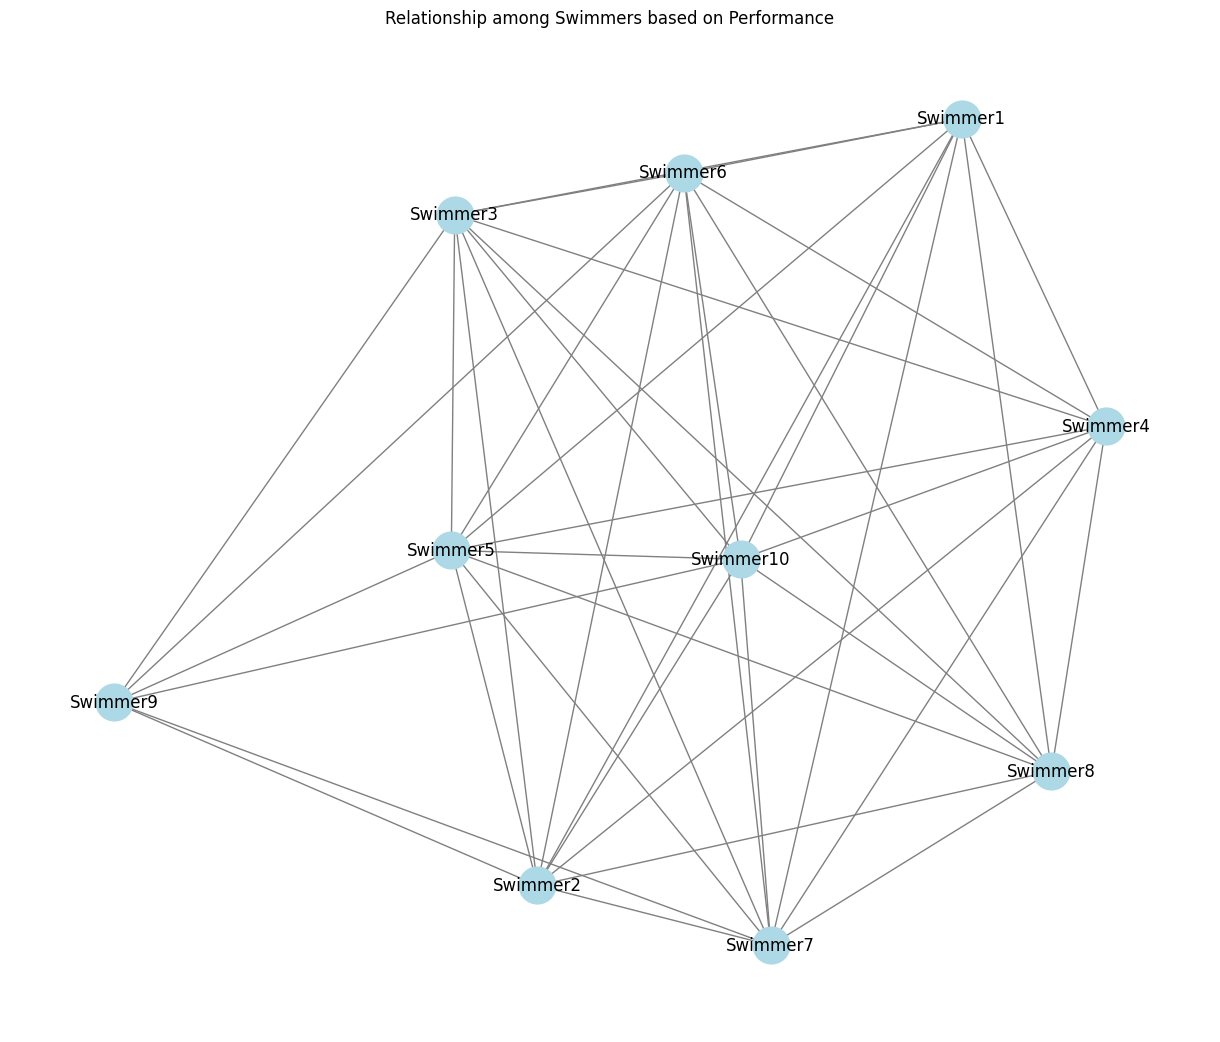

In [9]:
# Calculate total distance swum by each swimmer
df['Total_Distance'] = df.iloc[:, :-1].sum(axis=1)

# Create a graph
G = nx.Graph()

# Add nodes (each swimmer is a node)
for swimmer in df['Swimmer']:
    G.add_node(swimmer)

# Add edges (assuming a relationship if total distances are within 5% of each other)
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if abs(df.iloc[i]['Total_Distance'] - df.iloc[j]['Total_Distance']) / df.iloc[i]['Total_Distance'] < 0.05:
            G.add_edge(df.iloc[i]['Swimmer'], df.iloc[j]['Swimmer'])

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)
plt.title('Relationship among Swimmers based on Performance')
plt.show()


##### Task 2: Create a graph analytics based on the common interests of individuals 

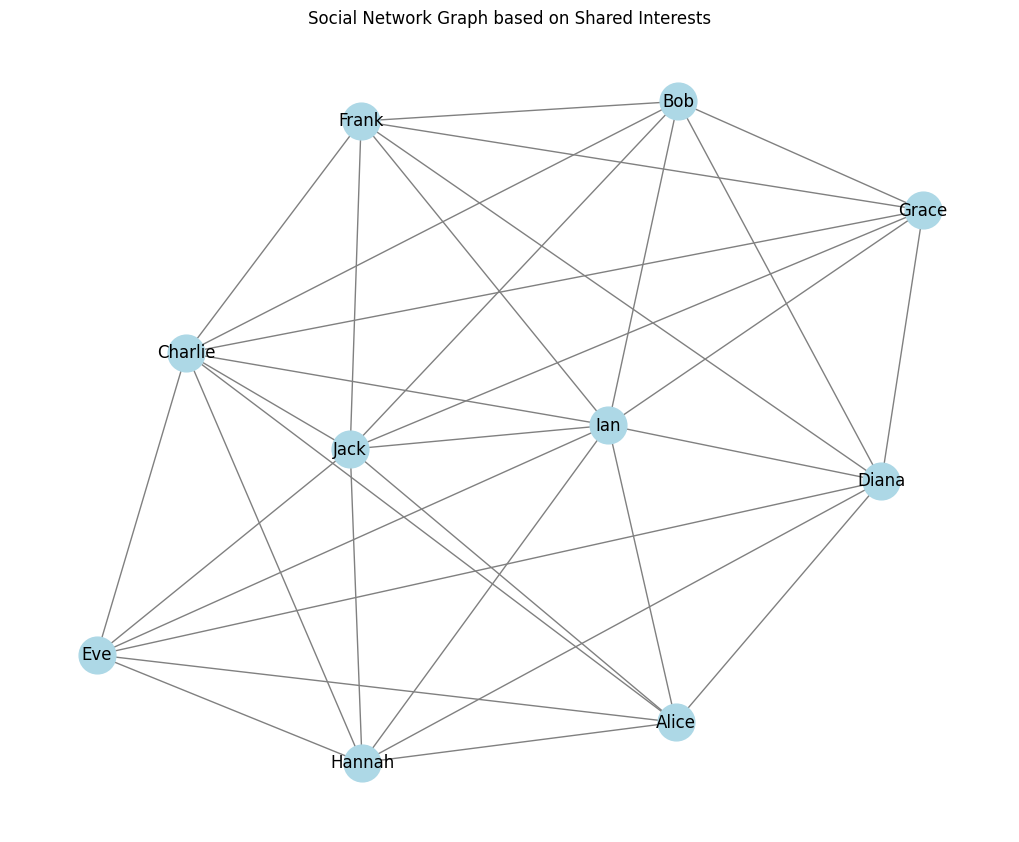

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Sample Data: Individuals and their interests
data = {
    'Individual': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'Interest1': ['Music', 'Sports', 'Reading', 'Music', 'Art', 'Sports', 'Reading', 'Art', 'Music', 'Reading'],
    'Interest2': ['Art', 'Reading', 'Art', 'Sports', 'Music', 'Reading', 'Sports', 'Music', 'Reading', 'Art']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a graph
G = nx.Graph()

# Add nodes (each individual is a node)
for individual in df['Individual']:
    G.add_node(individual)

# Add edges (assuming a connection if individuals share an interest)
for i in range(len(df)):
    for j in range(i+1, len(df)):
        interests_i = set(df.iloc[i][1:])
        interests_j = set(df.iloc[j][1:])
        if interests_i & interests_j:  # Intersection is not empty
            G.add_edge(df.iloc[i]['Individual'], df.iloc[j]['Individual'])

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)
plt.title('Social Network Graph based on Shared Interests')
plt.show()

##### Task 3: Create a graph analytics based on customers segmentation

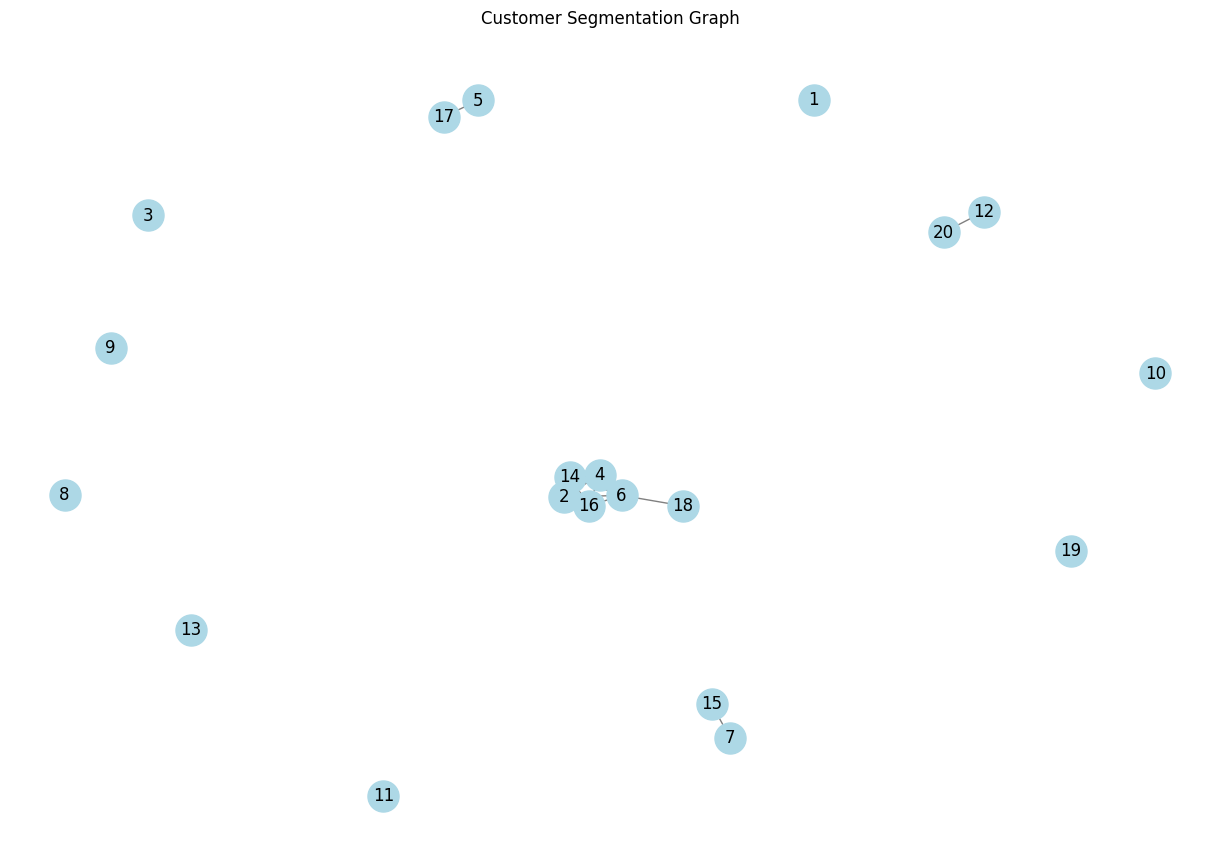

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Sample data: CustomerID, Age, Spending Score (1-100)
data = {
    'CustomerID': range(1, 21),
    'Age': [25, 22, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35, 20, 52, 35],
    'Spending_Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 14, 99, 15, 77, 13, 79, 35, 66, 29, 98]
}

df = pd.DataFrame(data)

# Create a graph
G = nx.Graph()

# Add nodes
for index, row in df.iterrows():
    G.add_node(row['CustomerID'], Age=row['Age'], Spending_Score=row['Spending_Score'])

# Add edges based on age and spending score similarity
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if abs(df.iloc[i]['Age'] - df.iloc[j]['Age']) <= 5 and abs(df.iloc[i]['Spending_Score'] - df.iloc[j]['Spending_Score']) <= 10:
            G.add_edge(df.iloc[i]['CustomerID'], df.iloc[j]['CustomerID'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title('Customer Segmentation Graph')
plt.show()

##### Task 4: Create graph analytics based on the centrality measure

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Generate a random graph
G = nx.gnp_random_graph(10, 0.5)
print(G)

Graph with 10 nodes and 23 edges


In [6]:
# Step 2: Define a function to draw the graph with centrality as node size
def draw_graph_with_centrality(G, centrality, title):
    # Normalize the centrality values to be between 0 and 1000 for node size
    centrality_values = [v * 1000 for v in centrality.values()]
    
    # Draw the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, node_size=centrality_values, 
            node_color=np.random.rand(len(G), 3), # Random colours
            cmap=plt.cm.Blues, font_weight='bold')
    plt.title(title)
    plt.show()

C:\Users\yubar\anaconda3\envs\spark_env\lib\site-packages\networkx\drawing\nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


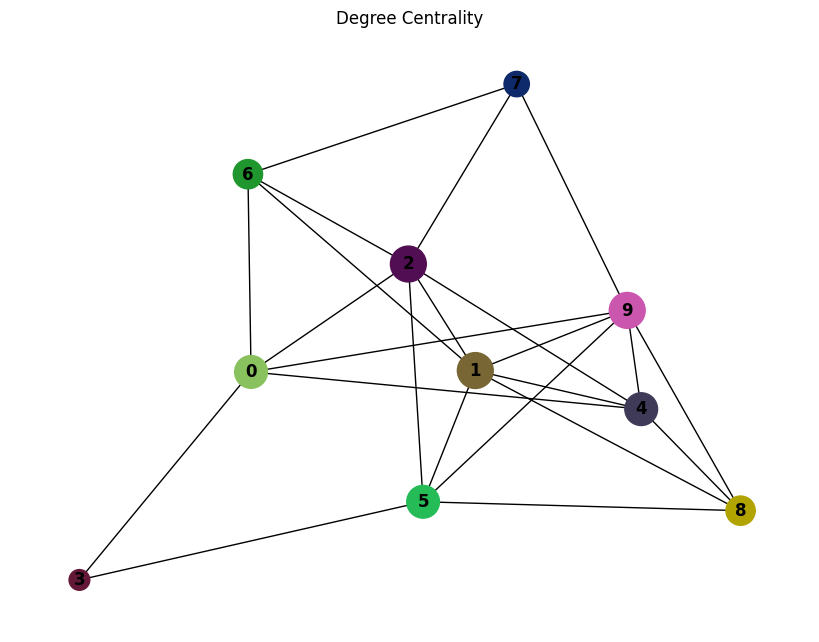

In [7]:
# Step 3: Calculate and visualize each centrality measure
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
draw_graph_with_centrality(G, degree_centrality, "Degree Centrality")

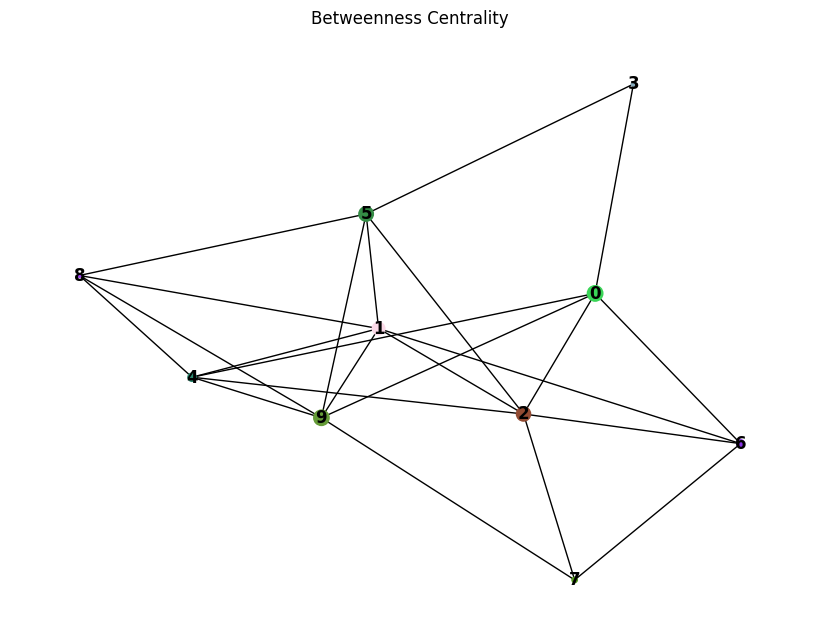

In [8]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
draw_graph_with_centrality(G, betweenness_centrality, "Betweenness Centrality")

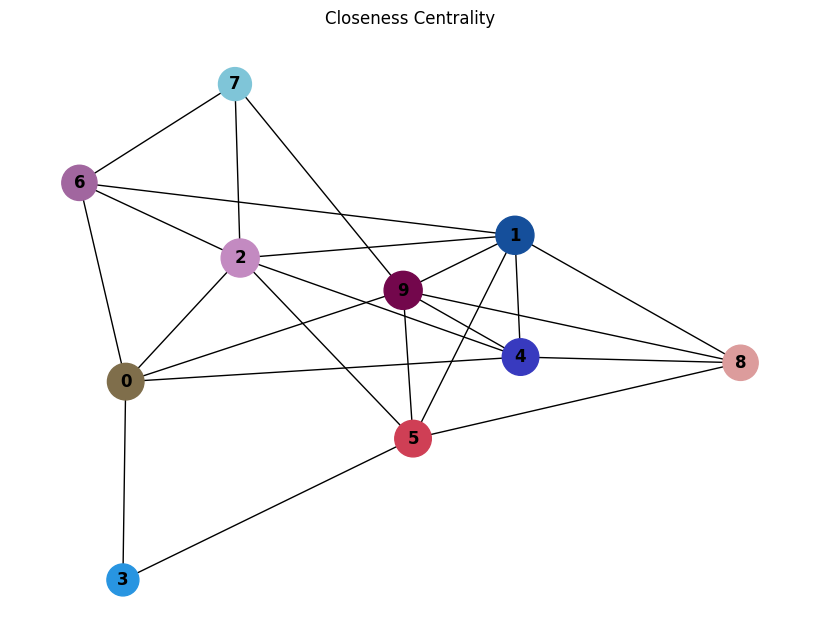

In [10]:
# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
draw_graph_with_centrality(G, closeness_centrality, "Closeness Centrality")

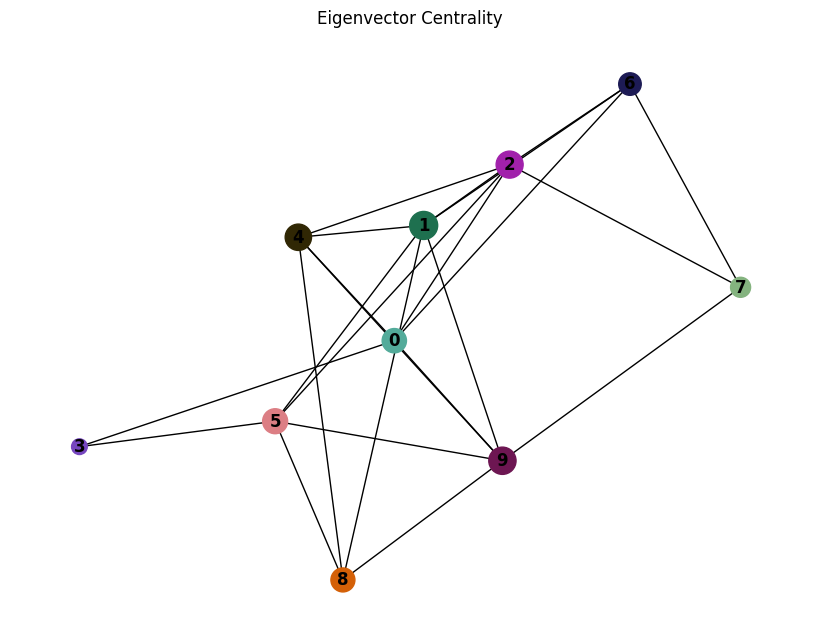

In [11]:
# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
draw_graph_with_centrality(G, eigenvector_centrality, "Eigenvector Centrality")